<a href="https://colab.research.google.com/github/sahil-khadka/Concepts_and-_techNologies_of_AI_Assignment-1/blob/main/2501492_Sahil_Khadka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assesment

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Human_Development_Index_Dataset.csv", encoding="latin1")

# Quick check
print(df.head())
print(df.info())

   Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
0           1  AFG  Afghanistan  1990  0.284           45.967     10.694796   
1           2  AFG  Afghanistan  1991  0.292           46.663     10.745167   
2           3  AFG  Afghanistan  1992  0.299           47.596     12.057433   
3           4  AFG  Afghanistan  1993  0.307           51.466     14.003760   
4           5  AFG  Afghanistan  1994  0.300           51.495     15.455554   

   hdi_f  hdi_m  life_expec_f  ...  gender_development  gender_inequality  \
0    NaN    NaN        48.397  ...                 NaN                NaN   
1    NaN    NaN        49.144  ...                 NaN                NaN   
2    NaN    NaN        50.320  ...                 NaN                NaN   
3    NaN    NaN        52.739  ...                 NaN                NaN   
4    NaN    NaN        53.544  ...                 NaN                NaN   

   secondary_education_f_%  secondary_education_m_%  seats_in_

Problem 1A

In [2]:
# 1. Extract Latest Year (2022)
hdi_2022_df = df[df['year'] == 2022].copy()

# 2. Exploration
print(hdi_2022_df.head(10))
print(hdi_2022_df.shape)
print(hdi_2022_df.dtypes)

# 3. Missing values & cleaning
print(hdi_2022_df.isnull().sum())
hdi_2022_df.drop_duplicates(inplace=True)
# Convert numeric columns
numeric_cols = ['hdi','gross_inc_percap','life_expectancy']
for col in numeric_cols:
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

# 4. Basic statistics
print("Mean HDI:", hdi_2022_df['hdi'].mean())
print("Median HDI:", hdi_2022_df['hdi'].median())
print("Std Dev HDI:", hdi_2022_df['hdi'].std())
print("Highest HDI:", hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()])
print("Lowest HDI:", hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()])

# 5. Filtering & sorting
high_hdi = hdi_2022_df[hdi_2022_df['hdi'] >= 0.800]
top10_gni = high_hdi.sort_values(by='gross_inc_percap', ascending=False).head(10)
print(top10_gni)

# 6. Add HDI Category
def classify_hdi(val):
    if val < 0.550: return "Low"
    elif val < 0.700: return "Medium"
    elif val < 0.800: return "High"
    else: return "Very High"

hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(classify_hdi)
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)

     Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
32      41.128771  0.332443  0.534145        66.213  ...               0.622   
65       2.842

Problem 1B

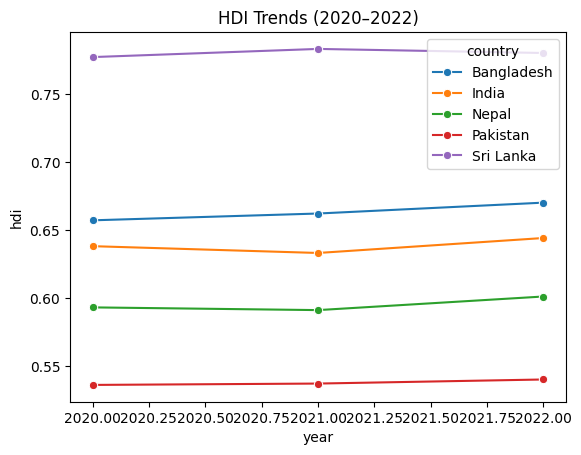

/tmp/ipython-input-3368433229.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_trend['region'] = hdi_trend['country'].map(region_map)


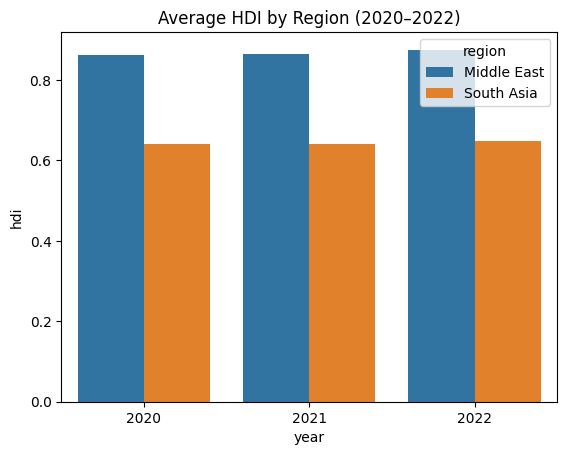

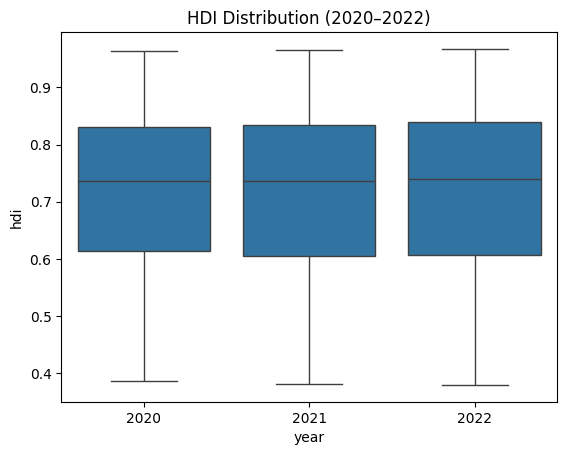

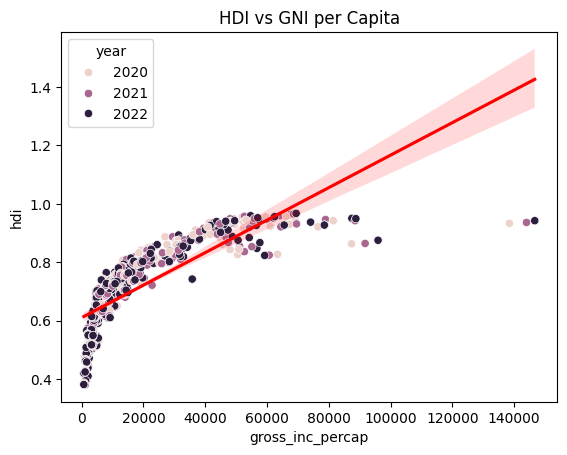

In [3]:
# Task 1: Extract 2020–2022
hdi_trend = df[df['year'].isin([2020,2021,2022])]
hdi_trend.to_csv("HDI_problem1B.csv", index=False)

# Task 3A: Line Chart
countries = ["Nepal","India","Bangladesh","Sri Lanka","Pakistan"]
subset = hdi_trend[hdi_trend['country'].isin(countries)]
sns.lineplot(data=subset, x="year", y="hdi", hue="country", marker="o")
plt.title("HDI Trends (2020–2022)")
plt.show()

# Task 3B: Bar Chart – Average HDI by Region
# Add region manually
region_map = {
    'Nepal': 'South Asia',
    'India': 'South Asia',
    'Bangladesh': 'South Asia',
    'Sri Lanka': 'South Asia',
    'Pakistan': 'South Asia',
    'Qatar': 'Middle East',
    'Saudi Arabia': 'Middle East',
}

hdi_trend['region'] = hdi_trend['country'].map(region_map)

region_avg = hdi_trend.groupby(['region','year'])['hdi'].mean().reset_index()
sns.barplot(data=region_avg, x="year", y="hdi", hue="region")
plt.title("Average HDI by Region (2020–2022)")
plt.show()

# Task 3C: Box Plot
sns.boxplot(data=hdi_trend, x="year", y="hdi")
plt.title("HDI Distribution (2020–2022)")
plt.show()

# Task 3D: Scatter Plot
sns.scatterplot(data=hdi_trend, x="gross_inc_percap", y="hdi", hue="year")
sns.regplot(data=hdi_trend, x="gross_inc_percap", y="hdi", scatter=False, color="red")
plt.title("HDI vs GNI per Capita")
plt.show()

Problem-2

/tmp/ipython-input-4093524649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_df['Composite_Score'] = 0.3*south_df['life_expectancy'] + 0.3*south_df['gross_inc_percap']


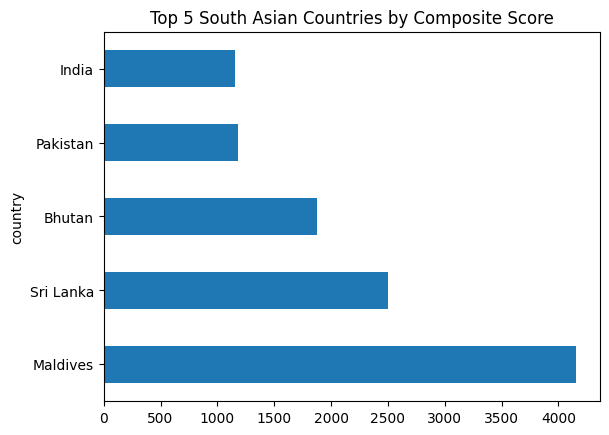

                         hdi  life_expectancy  gender_development
hdi                 1.000000         0.958761            0.865621
life_expectancy     0.958761         1.000000            0.829553
gender_development  0.865621         0.829553            1.000000


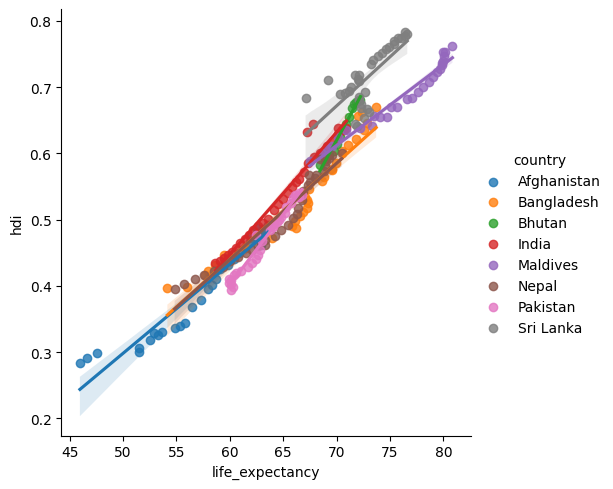

/tmp/ipython-input-4093524649.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_df['GNI_HDI_Gap'] = south_df['gross_inc_percap'] - south_df['hdi']


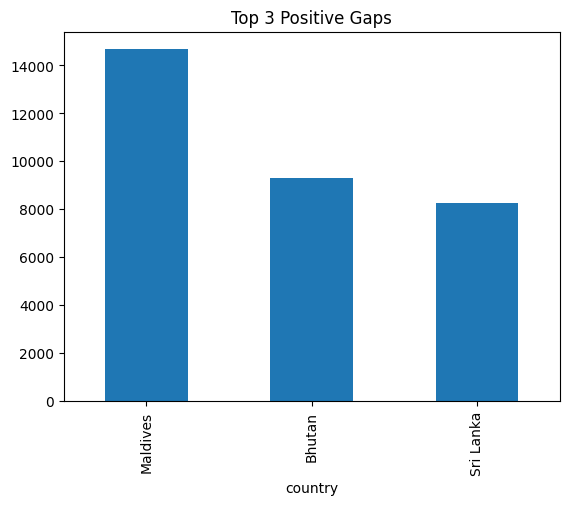

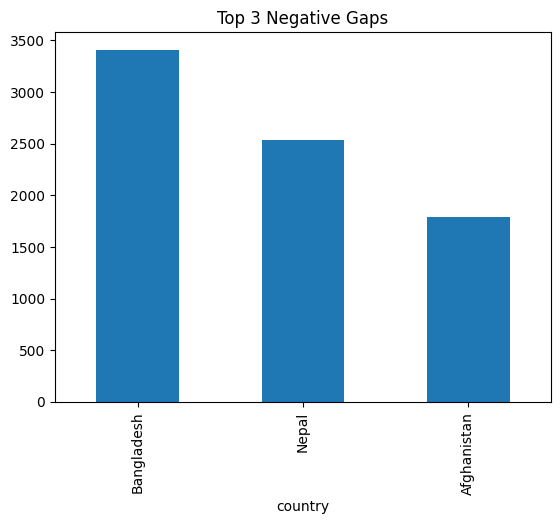

In [4]:
# Task 1: South Asia Subset
south_asia = ["Afghanistan","Bangladesh","Bhutan","India","Maldives","Nepal","Pakistan","Sri Lanka"]
south_df = df[df['country'].isin(south_asia)]
south_df.to_csv("HDI_SouthAsia.csv", index=False)

# Task 2: Composite Score
south_df['Composite_Score'] = 0.3*south_df['life_expectancy'] + 0.3*south_df['gross_inc_percap']
top5 = south_df.groupby('country')['Composite_Score'].mean().sort_values(ascending=False).head(5)
top5.plot(kind='barh', title="Top 5 South Asian Countries by Composite Score")
plt.show()

# Task 3: Outlier Detection
Q1 = south_df['hdi'].quantile(0.25)
Q3 = south_df['hdi'].quantile(0.75)
IQR = Q3 - Q1
outliers = south_df[(south_df['hdi'] < Q1 - 1.5*IQR) | (south_df['hdi'] > Q3 + 1.5*IQR)]

# Task 4: Correlation
print(south_df[['hdi','life_expectancy','gender_development']].corr())
sns.lmplot(data=south_df, x="life_expectancy", y="hdi", hue="country")
plt.show()

# Task 5: Gap Analysis
south_df['GNI_HDI_Gap'] = south_df['gross_inc_percap'] - south_df['hdi']
gap_rank = south_df.groupby('country')['GNI_HDI_Gap'].mean().sort_values(ascending=False)
gap_rank.head(3).plot(kind='bar', title="Top 3 Positive Gaps")
plt.show()
gap_rank.tail(3).plot(kind='bar', title="Top 3 Negative Gaps")
plt.show()

Problem-3

South Asia HDI Stats:
 count    24.000000
mean      0.639583
std       0.098273
min       0.462000
25%       0.578250
50%       0.650500
75%       0.695000
max       0.783000
Name: hdi, dtype: float64
Middle East HDI Stats:
 count    33.000000
mean      0.788909
std       0.141295
min       0.424000
25%       0.736000
50%       0.836000
75%       0.884000
max       0.937000
Name: hdi, dtype: float64


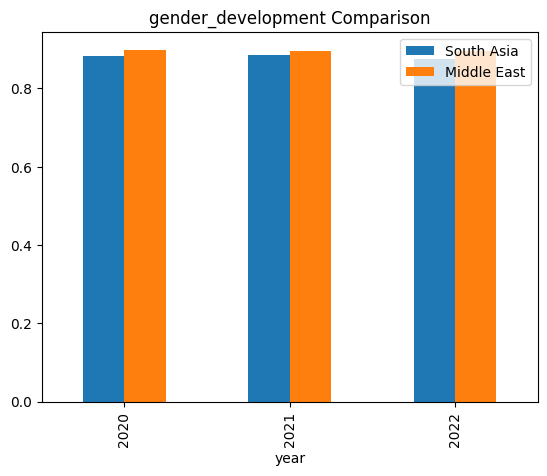

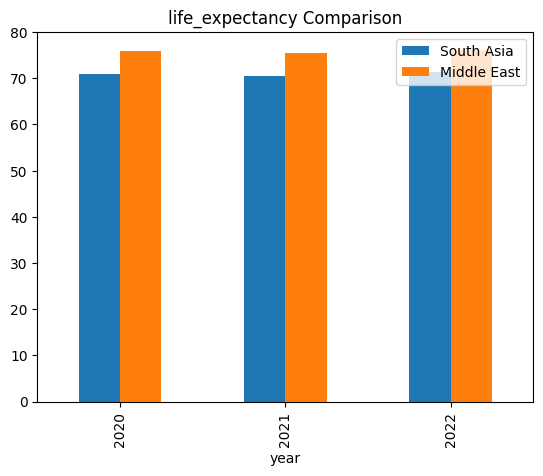

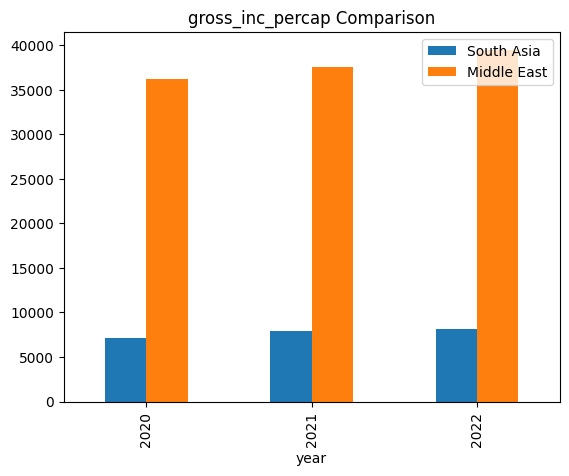

South Asia Correlations:
                          hdi  gender_development  life_expectancy
hdi                 1.000000            0.874218         0.938764
gender_development  0.874218            1.000000         0.853780
life_expectancy     0.938764            0.853780         1.000000
Middle East Correlations:
                          hdi  gender_development  life_expectancy
hdi                 1.000000            0.935670         0.933123
gender_development  0.935670            1.000000         0.912836
life_expectancy     0.933123            0.912836         1.000000


In [5]:
# Task 1: Middle East Subset
middle_east = ["Bahrain","Iran","Iraq","Israel","Jordan","Kuwait","Lebanon","Oman","Palestine","Qatar","Saudi Arabia","Syria","United Arab Emirates","Yemen"]
me_df = hdi_trend[hdi_trend['country'].isin(middle_east)]
sa_df = hdi_trend[hdi_trend['country'].isin(south_asia)]

me_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)
sa_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)

# Task 2: Descriptive Stats
print("South Asia HDI Stats:\n", sa_df['hdi'].describe())
print("Middle East HDI Stats:\n", me_df['hdi'].describe())

# Task 3: Top & Bottom Performers
top_sa = sa_df.groupby('country')['hdi'].mean().sort_values(ascending=False).head(3)
bottom_sa = sa_df.groupby('country')['hdi'].mean().sort_values().head(3)
top_me = me_df.groupby('country')['hdi'].mean().sort_values(ascending=False).head(3)
bottom_me = me_df.groupby('country')['hdi'].mean().sort_values().head(3)

# Task 4: Metric Comparisons
metrics = ['gender_development','life_expectancy','gross_inc_percap']
for m in metrics:
    comp = pd.concat([
        sa_df.groupby('year')[m].mean().rename("South Asia"),
        me_df.groupby('year')[m].mean().rename("Middle East")
    ], axis=1)
    comp.plot(kind='bar', title=f"{m} Comparison")
    plt.show()

# Task 6: Correlation Analysis
print("South Asia Correlations:\n", sa_df[['hdi','gender_development','life_expectancy']].corr())
print("Middle East Correlations:\n", me_df[['hdi','gender_development','life_expectancy']].corr())

In [14]:
from google.colab import files
files.download("HDI_category_added.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>